In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
wine = pd.read_csv("C:/Users/user/Desktop/Sneha's Program/ML Datasets/winequalityN.csv")
wine.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
wine.keys()

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [7]:
add = wine.isnull().sum()
percent = (wine.isnull().sum()/wine.isnull().count())
h=pd.concat([add,percent], axis =1, keys = ['Sum', 'Percentage'])

In [8]:
def null_cell(df):
    total_missing_values = df.isnull().sum()
    missing_values_per = df.isnull().sum()/df.isnull().count()
    
    #crating df to list null values & percentage
    null_values = pd.concat([total_missing_values, missing_values_per], axis =1, keys = ['Total Null', 'Percentage'])
    #Sorting Null Values
    null_values = null_values.sort_values('Total Null', ascending =False)
    
    #retuning attributes having null values
    return null_values[null_values['Total Null'] > 0]

In [9]:
fill_list =  (null_cell(wine)).index
fill_list

Index(['fixed acidity', 'pH', 'volatile acidity', 'sulphates', 'citric acid',
       'residual sugar', 'chlorides'],
      dtype='object')

In [10]:
pp_wine =  wine.copy()

for col in fill_list:
    pp_wine.loc[:,col].fillna(pp_wine.loc[:,col].mean(), inplace =True)

In [11]:
pp_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
corr_matrix = pp_wine.corr()
corr_matrix


C:\Users\user\AppData\Local\Temp\ipykernel_4440\923177319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pp_wine.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


In [13]:
corr_list =corr_matrix.quality.abs().sort_values(ascending = False).index[0:]
corr_list

Index(['quality', 'alcohol', 'density', 'volatile acidity', 'chlorides',
       'citric acid', 'fixed acidity', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'residual sugar', 'pH'],
      dtype='object')

<Axes: >

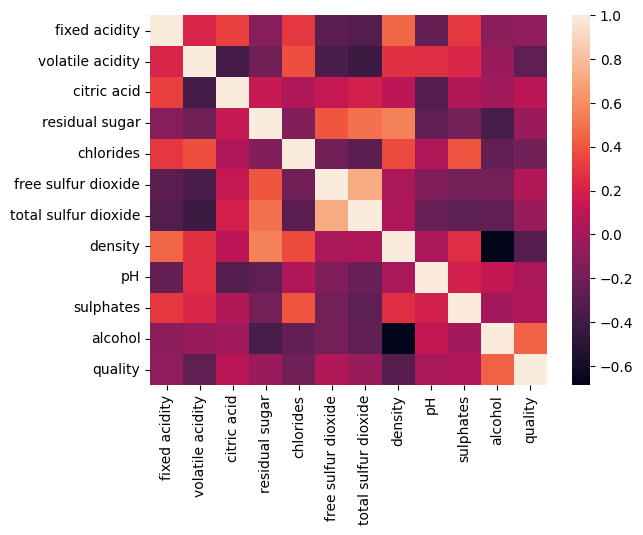

In [14]:
sns.heatmap(corr_matrix)

In [15]:
plt.figure(figsize =(8,7))
sns.scatterplot(x='quality_range', y = 'alcohol', hue = 'type', data = df_bins);
plt.xlabel('Quality', size=15)
plt.ylabel('Alcohol', size=15)
plt.show()

NameError: name 'df_bins' is not defined

<Figure size 800x700 with 0 Axes>

NameError: name 'df_bins' is not defined

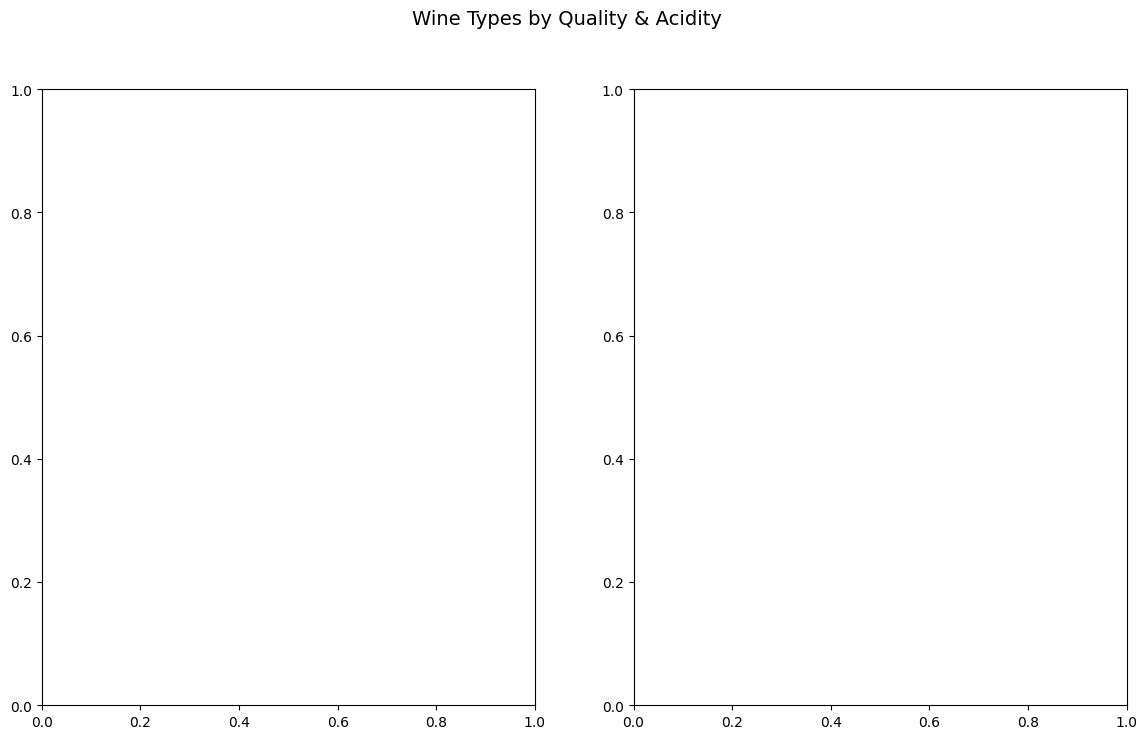

In [17]:
f,(ax1,ax2) =plt.subplots(1,2, figsize=(14, 8))
f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

sns.violinplot(x = 'quality_range', y = 'volatile_acidity', hue =' type', data =df_bins, split =True, inner ='quart', linewidth = 1.3, palette = {'red':'red','white':'white'}, ax=ax1)
ax1.set_xlabel('Wine Quality Class ',size = 15, alpha =0.8)
ax1.set_ylabel('Wine Acidity Class ',size = 15, alpha =0.8)

sns.violinplot(x='quality_range', y='alcohol', hue = 'type', data= df_bins, split = True, inner ='quart', linewidth = 1.3, palette = {'red':'darkred','white':'white'}, ax=ax2)
ax2.set_xlabel('Wine Quality Class ',size = 15, alpha =0.8)
ax2.set_ylabel('Wine Acidity Class ',size = 15, alpha =0.8)
plt.show()

In [18]:
plt.figure(figsize=(6,4))

low_quality = df_bins[df_bins['quality_range']==0]['chlorides']
high_quality = df_bins[df_bins['quality_range']==1]['chlorides']

ax = sns.kdeplot(data=low_quality, label = 'low_quality', shades =True, color = None)
ax = sns.kdeplot(data=high_quality, label = 'high_quality', shades =True, color = None)

NameError: name 'df_bins' is not defined

<Figure size 600x400 with 0 Axes>